# AutoCorrelation

This notebook examines auto-correlation measures applied to simulated neural time series.

This notebook covers:
- autocorrelation
- autocorrelation decay time

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.aperiodic import compute_autocorr
from neurodsp.sim import sim_powerlaw, sim_combined, sim_synaptic_current

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims, run_sims_load
from apm.methods import autocorr, autocorr_decay_time, compute_decay_time
from apm.methods.settings import AC_PARAMS, AC_DECAY_PARAMS
from apm.plts import plot_lines, plot_colorbar
from apm.plts.sims import plot_sims, plot_ap_sims, plot_pe_sims
from apm.plts.utils import truncate_colormap
from apm.plts.settings import EXT, COLORS
from apm.sim.settings import (FS, N_SIMS, EXPS, FREQS, POWERS, BWS, KNEES, 
                              SIM_PARAMS_AP, SIM_PARAMS_COMB, SIM_PARAMS_KNEE)
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB, SIG_PEAK

In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Add sampling rate to settings
AC_DECAY_PARAMS['fs'] = FS

In [5]:
# # Set custom max lag time for autocorrelation
# AC_PARAMS['max_lag'] = 125

In [6]:
# Custom settings for autocorrelation - downsample frequencies and powers
FREQS2 = np.arange(5, 40, 10)
POWERS2 = np.arange(0, 2.5, 0.5)

In [7]:
# Check auto-correlation parameters
print(AC_PARAMS)
print(AC_DECAY_PARAMS)

{'max_lag': 250, 'lag_step': 1}
{'fs': 250, 'max_lag': 1500, 'lag_step': 2, 'level': 0.5}


In [8]:
# Set the colormap for the plots
cmap_name = 'BuGn_r'
cmap_range = (0., 0.75)

# Get the requested colormap & range
cmap = truncate_colormap(plt.get_cmap(cmap_name), *cmap_range)

# Set up the colors for plotting
exp_colors = cmap(np.linspace(0., 1.0, len(EXPS)))
freq_colors = cmap(np.linspace(0., 1.0, len(FREQS2)))
power_colors = cmap(np.linspace(0., 1.0, len(POWERS2)))

In [9]:
# Plot settings
PLT_KWARGS = {
    'xlabel' : 'Time (s)',
    'ylabel' : 'Autocorrelation',
}

In [10]:
# Settings for saving figures
SAVE_FIG = True
FIGPATH = APMDB().figs_path / '21_autocorr'

In [11]:
# Settings for loading simulations
SIMPATH = APMDB().sims_path / 'time_series'

## AutoCorrelation Measures

The autocorrelation of a signal is measured as the correlation between a signal, and a time-lagged copy of itself. This is typically computed a range of different time lags.

The autocorrelation decay time is a measure of how quickly the autocorrelation decays to a given value - for example, at what timelag the autocorrelation first crosses below zero.

### Measures on Example Signals

First, we will calculate the autocorrelation across different example signals.

### Powerlaw Signals

In [12]:
# Calculate autocorrelation
times, sig_ap_ac = compute_autocorr(SIG_AP, **AC_PARAMS)

In [13]:
# Compute decay rate time
ap_decay = autocorr_decay_time(SIG_AP, **AC_DECAY_PARAMS)
ap_decay

2.28

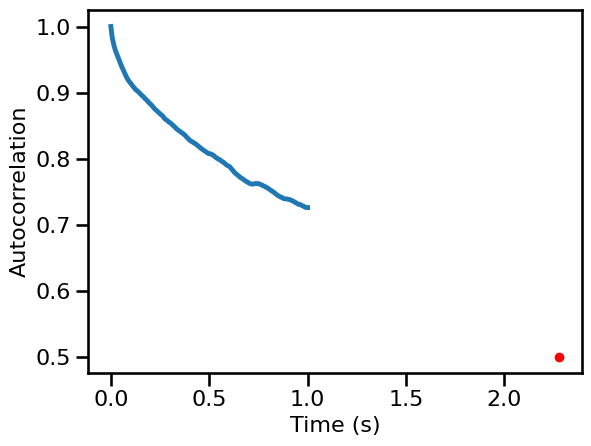

In [14]:
# Plot the autocorrelation across time delays
plot_lines(times / FS, sig_ap_ac, **PLT_KWARGS,
           save_fig=SAVE_FIG, file_name='ac_ap' + EXT, file_path=FIGPATH)
plt.gca().plot(ap_decay, AC_DECAY_PARAMS['level'], '.', ms=12, color='red')

### Oscillatory Signal

In [15]:
# Calculate autocorrelation
times, sig_osc_ac = compute_autocorr(SIG_OSC, **AC_PARAMS)

In [16]:
# Compute decay rate time
osc_decay = autocorr_decay_time(SIG_OSC, **AC_DECAY_PARAMS)
osc_decay

0.024

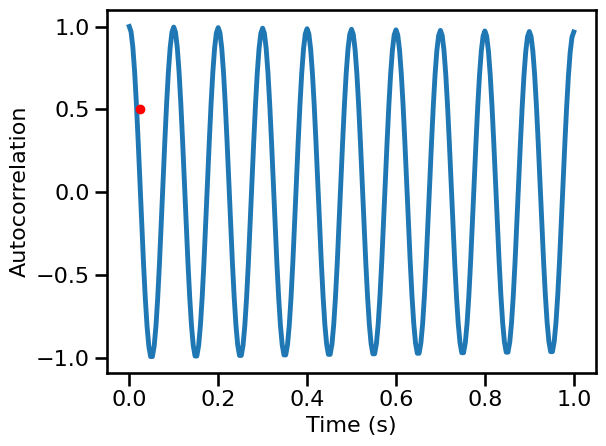

In [17]:
# Plot the autocorrelation across time delays
plot_lines(times / FS, sig_osc_ac, **PLT_KWARGS,
           save_fig=SAVE_FIG, file_name='ac_osc' + EXT, file_path=FIGPATH)
plt.gca().plot(osc_decay, AC_DECAY_PARAMS['level'], '.', ms=12, color='red')

### Combined Signal

In [18]:
# Calculate autocorrelation
times, sig_comb_ac = compute_autocorr(SIG_COMB, **AC_PARAMS)

In [19]:
# Compute decay rate time
comb_decay = autocorr_decay_time(SIG_COMB, **AC_DECAY_PARAMS)
comb_decay

0.032

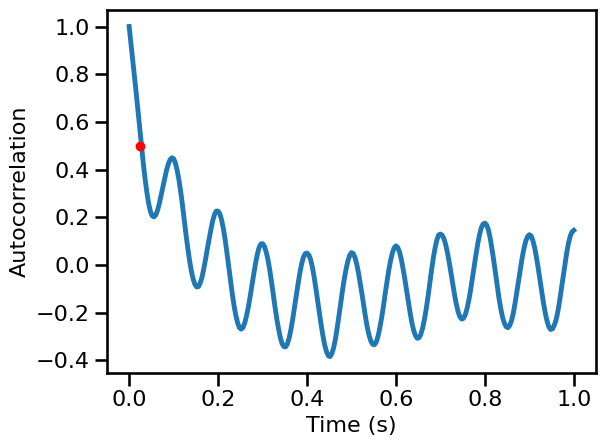

In [20]:
# Plot the autocorrelation across time delays
plot_lines(times / FS, sig_comb_ac, **PLT_KWARGS,
           save_fig=SAVE_FIG, file_name='ac_comb' + EXT, file_path=FIGPATH)
plt.gca().plot(osc_decay, AC_DECAY_PARAMS['level'], '.', ms=12, color='red')

### Powerlaw Signals with a Knee

In [21]:
# Calculate autocorrelation
times, sig_kn_ac = compute_autocorr(SIG_KN, **AC_PARAMS)

In [22]:
# Compute decay rate time
kn_decay = autocorr_decay_time(SIG_KN, **AC_DECAY_PARAMS)
kn_decay

0.008

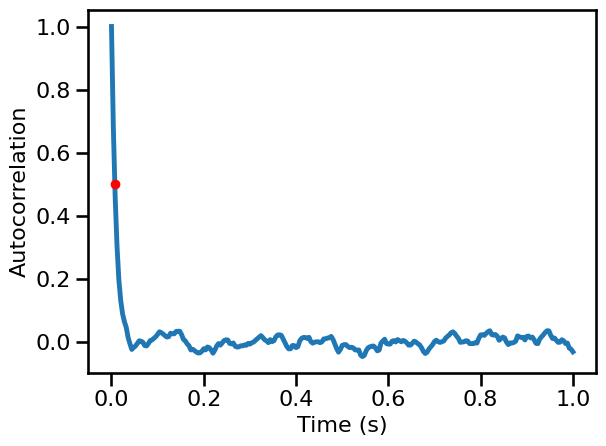

In [23]:
# Plot the autocorrelation across time delays
plot_lines(times / FS, sig_kn_ac, **PLT_KWARGS,
           save_fig=SAVE_FIG, file_name='ac_knee' + EXT, file_path=FIGPATH)
plt.gca().plot(kn_decay, AC_DECAY_PARAMS['level'], '.', ms=12, color='red')

## AutoCorrelation Simulations: Aperiodic Variations

### Powerlaw Signals

In [24]:
# Run a set of simulations, calculating autocorrelation across exponents
ac_sims_exp, _ = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, autocorr, AC_PARAMS, 'update_exp', EXPS, N_SIMS)

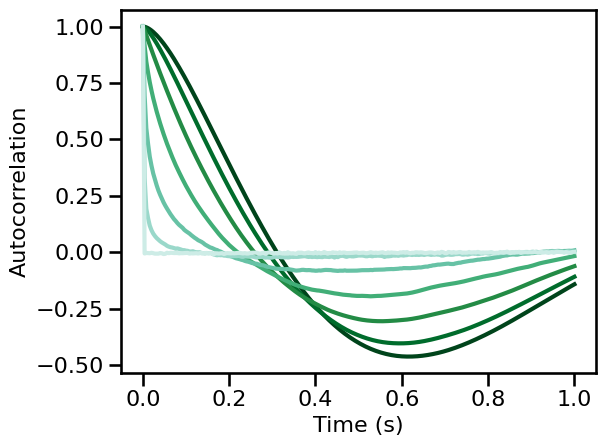

In [25]:
# Plot autocorrelation across exponent values
for ac, color in zip(ac_sims_exp, exp_colors):
    plot_lines(times / FS, ac, color=color, lw=3)
plot_lines(**PLT_KWARGS, save_fig=SAVE_FIG, file_name='ac_exp' + EXT, file_path=FIGPATH)

In [26]:
# Run a set of simulations, calculating autocorrelation across exponents
decay_sims_exp, decay_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, autocorr_decay_time, AC_DECAY_PARAMS, 'update_exp', EXPS, N_SIMS)

### Combined Signals

In [27]:
# Run a set of simulations, calculating autocorrelation across exponents, with an oscillation
ac_sims_comb, _ = run_sims(
    sim_combined, SIM_PARAMS_COMB, autocorr, AC_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

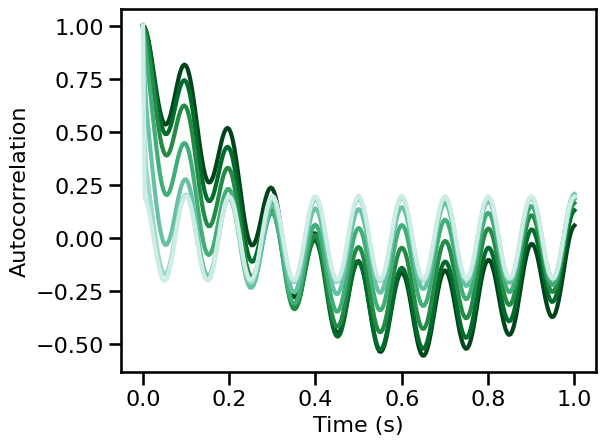

In [28]:
# Plot autocorrelation across exponent values
for ac, color in zip(ac_sims_comb, exp_colors):
    plot_lines(times / FS, ac, color=color, lw=3)
plot_lines(**PLT_KWARGS, save_fig=SAVE_FIG, file_name='ac_comb' + EXT, file_path=FIGPATH)

In [29]:
# Run a set of simulations, calculating autocorrelation across exponents
decay_sims_comb, decay_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, autocorr_decay_time, AC_DECAY_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

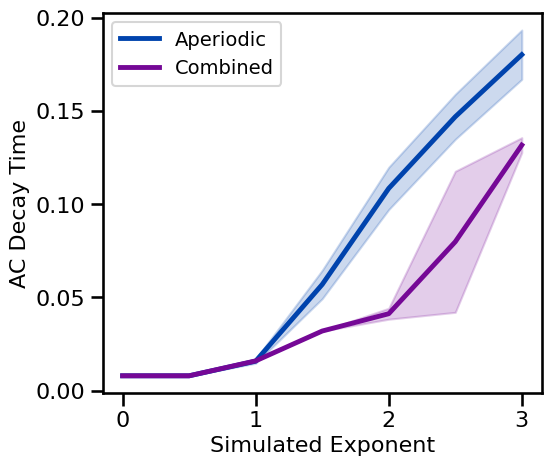

In [30]:
# Plot AC decay rate estimates across aperiodic variations
plot_ap_sims(decay_sims_exp, decay_sims_exp_var, decay_sims_comb, decay_sims_comb_var,
             'AC Decay Time', save_fig=SAVE_FIG, file_name='ac_decay_ap' + EXT, file_path=FIGPATH)

## AutoCorrelation Simulations: Periodic Variations

### Oscillation Frequency

In [31]:
# Run a set of simulations, calculating autocorrelations across oscillation frequency
ac_sims_freq, _ = run_sims(\
    sim_combined, SIM_PARAMS_COMB, autocorr, AC_PARAMS, 'update_freq', FREQS2, N_SIMS)

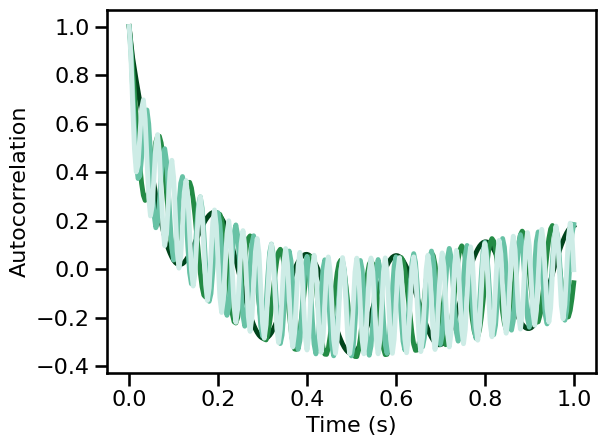

In [32]:
# Plot autocorrelation across oscillation frequency
for ac, color in zip(ac_sims_freq, freq_colors):
    plot_lines(times / FS, ac, color=color)
plot_lines(**PLT_KWARGS, save_fig=SAVE_FIG, file_name='ac_osc_freq' + EXT, file_path=FIGPATH)

In [33]:
# Run a set of simulations, calculating autocorrelation across oscillation frequency
decay_sims_freq, decay_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, autocorr_decay_time, AC_DECAY_PARAMS, 'update_freq', FREQS, N_SIMS)

### Oscillation Power

In [34]:
# Run a set of simulations, calculating autocorrelations across oscillation power
ac_sims_pow, _ = run_sims(\
    sim_combined, SIM_PARAMS_COMB, autocorr, AC_PARAMS, 'update_pow', POWERS2, N_SIMS)

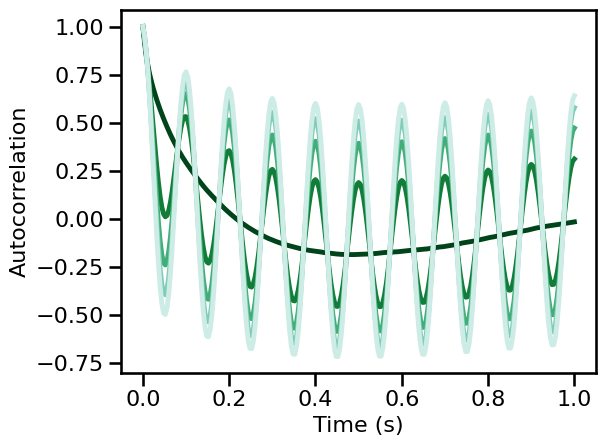

In [35]:
# Plot autocorrelation across oscillation power
for ac, color in zip(ac_sims_pow, power_colors):
    plot_lines(times / FS, ac, color=color)
plot_lines(**PLT_KWARGS, save_fig=SAVE_FIG, file_name='ac_osc_pow' + EXT, file_path=FIGPATH)

In [36]:
# Run a set of simulations, calculating autocorrelation across oscillation power
decay_sims_pow, decay_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, autocorr_decay_time, AC_DECAY_PARAMS, 'update_pow', POWERS, N_SIMS)

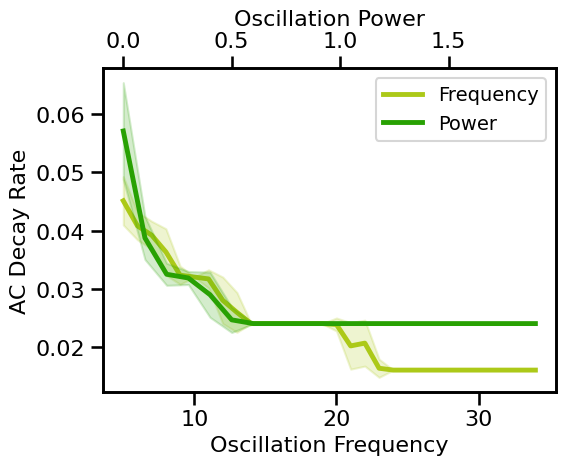

In [37]:
# Plot AC decay rate estimates across periodic variations
plot_pe_sims(decay_sims_freq, decay_sims_freq_var, decay_sims_pow, decay_sims_pow_var,
             'AC Decay Rate', save_fig=SAVE_FIG, file_name='ac_decay_pe' + EXT, file_path=FIGPATH)

## Simulations: Knee Variations

In [38]:
# Run a set of simulations, calculating autocorrelations across oscillation power
ac_sims_knee, _ = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, autocorr, AC_PARAMS, 'update_knee', KNEES, N_SIMS)

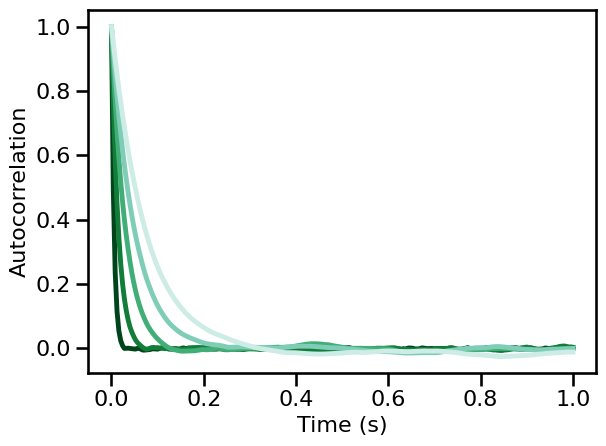

In [39]:
# Plot autocorrelation across oscillation power
for ac, color in zip(ac_sims_knee, power_colors):
    plot_lines(times / FS, ac, color=color)
plot_lines(**PLT_KWARGS, save_fig=SAVE_FIG, file_name='ac_osc_kn' + EXT, file_path=FIGPATH)

In [40]:
# Run a set of simulations, calculating IRASA estimation across different timescales
decay_sims_knee, decay_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, autocorr_decay_time, AC_DECAY_PARAMS, 'update_knee', KNEES, N_SIMS)

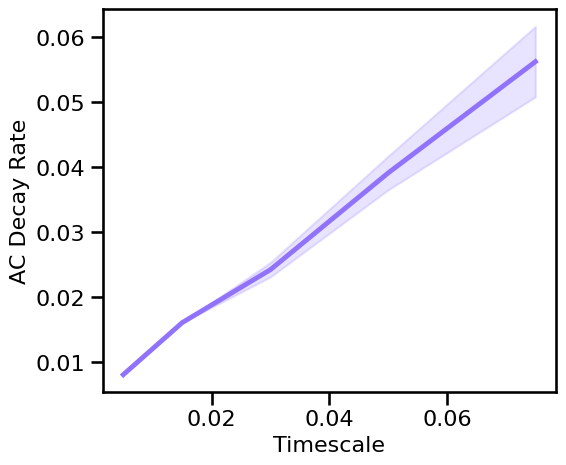

In [41]:
# Plot the estimated AC decay rate across different timescales
plot_sims(KNEES, decay_sims_knee, decay_sims_knee_var,
          'Timescale', 'AC Decay Rate', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='ac_decay_kn' + EXT, file_path=FIGPATH)

## Simulations: Bandwidth Variations

In [42]:
# Run a set of simulations, calculating IRASA estimate across peak bandwidth (sims from file)
ac_sims_bw, _ = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', autocorr, AC_PARAMS)

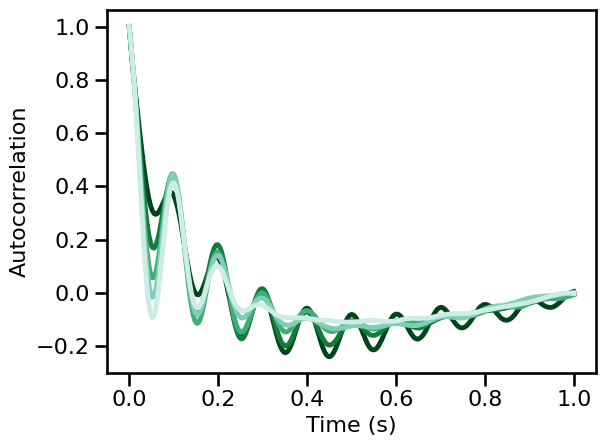

In [43]:
# Plot autocorrelation across oscillation power
for ac, color in zip(ac_sims_bw, power_colors):
    plot_lines(times / FS, ac, color=color)
plot_lines(**PLT_KWARGS, save_fig=SAVE_FIG, file_name='ac_osc_bw' + EXT, file_path=FIGPATH)

In [44]:
# Run a set of simulations, calculating AC decay rate across peak bandwidths
decay_sims_bw, decay_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', autocorr_decay_time, AC_DECAY_PARAMS)

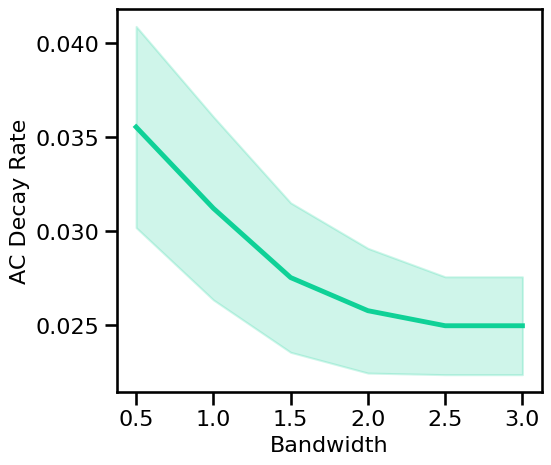

In [45]:
# Plot the estimated AC decay across peak bandwidth
plot_sims(BWS, decay_sims_bw, decay_sims_bw_var, 
          'Bandwidth', 'AC Decay Rate', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='ac_decay_bw' + EXT, file_path=FIGPATH)

### Create colorbars for the plots

In [46]:
# Make colorbars for the plots
plot_colorbar(cmap, min(np.abs(EXPS)), max(np.abs(EXPS)), 'exponent', close=True,
              save_fig=SAVE_FIG, file_name='cbar_ac_exp' + EXT, file_path=FIGPATH)
plot_colorbar(cmap, min(KNEES), max(KNEES), 'knee', close=True,
              save_fig=SAVE_FIG, file_name='cbar_ac_knee' + EXT, file_path=FIGPATH)
plot_colorbar(cmap, min(FREQS), max(FREQS), 'frequency', close=True,
              save_fig=SAVE_FIG, file_name='cbar_ac_freq' + EXT, file_path=FIGPATH)
plot_colorbar(cmap, min(POWERS), max(POWERS), 'power', close=True,
              save_fig=SAVE_FIG, file_name='ac_pow_cbar' + EXT, file_path=FIGPATH)
plot_colorbar(cmap, min(BWS), max(BWS), 'bw', close=True,
              save_fig=SAVE_FIG, file_name='cbar_ac_bw' + EXT, file_path=FIGPATH)

## Conclusions

Overall, we can see the following patterns in these simulations:

Autocorrelation:
- The autocorrelation of 1/f signals decreases across increasing time lags
    - The quickness of this decay relates to the 1/f exponent
- The autocorrelation of periodic signals is itself rhythmic
    - The frequency and scale of the autocorrelation relates to oscillatory frequency and power respectively
- The autocorrelation of combined signals exhibits with decreasing + rhythmic properties of each component